In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Specify input parameters

In [27]:
# the paths work if the notebook is run from the kosatka/experiments directory
versions = [
    ("./optimized_DPLL.csv", "DPLL"),
    ("./optimized_CDCL.csv", "CDCL"),
    ("./optimized_CDCL_TWL.csv", "CDCL + TWL"),
    ("./optimized_CDCL_TWL_EVSIDS.csv", "CDCL + TWL + EVSIDSwrong"),
    # ("./optimized_CDCL_TWL_EVSIDS_REST-LUBY256.csv", "CDCL + TWL + EVSIDS + Luby256"),
    # ("./optimized_CDCL_TWL_EVSIDS_REST-LUBY256_PHASE.csv", "CDCL + TWL + EVSIDS + Luby256 + ps"),
    ("./optimized_CDCL_TWL_EVSIDS_REST-LUBY2_PHASE.csv", "CDCL + TWL + EVSIDSwrong + Luby2 + ps"),
    ("./optimized_CDCL_TWL_EVSIDScorrect_REST-LUBY2_PHASE.csv", "CDCL + TWL + EVSIDS + Luby2 + ps")
]

### Helper functions

In [28]:
def microsec_to_sec(df: pd.DataFrame, col: str):
    df[col] = df[col] / 1000000


### Cactus plot

In [29]:
column = "user_time"
timeout = 120

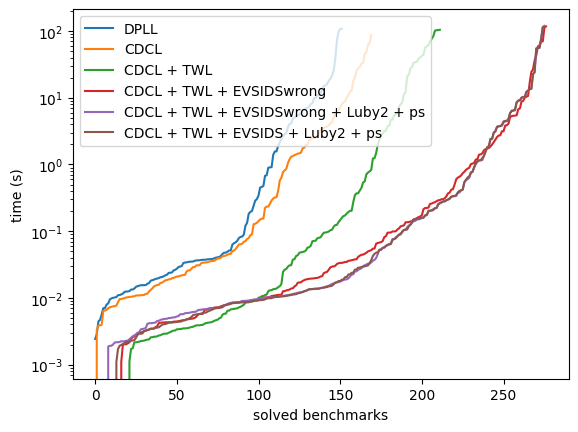

In [30]:
fig, ax = plt.subplots()
ax.set_xlabel("solved benchmarks")
ax.set_ylabel("time (s)")

for file, name in versions:
    df = pd.read_csv(file)
    microsec_to_sec(df, column)

    ordered = df.sort_values(by=column, ascending=True)
    ordered = ordered.reset_index(drop=True)

    ax.plot(ordered.index, ordered[column], label=name)

ax.legend()
ax.set_yscale("log")